In [118]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import os
master_dir = os.path.abspath("../")
master_dir

'D:\\Coding\\master-thesis-AI'

# Illustration of perceptron & linear regression

## Linear regression

In [119]:
def linear_func(x, w = 2, b = 3):
    return w*x+b

In [120]:
def linear_regression(x, y):
    """Russell and Norvig page 695"""
    N = len(x)
    w = (N * np.dot(x, y) - np.sum(x) * np.sum(y))/(N * np.sum(x**2) - np.sum(x)**2)
    b = (np.sum(y) - w * np.sum(x))/N
    
    return w, b

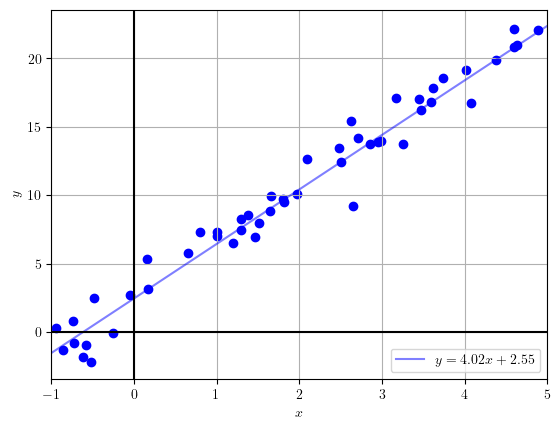

In [121]:
# Plot hyperparams
WTRUE=3.98451
BTRUE=2.45132
alpha=0.5

# True function
xmin = -1
xmax = 5
xvals = np.arange(xmin, xmax, 0.01)
yvals = linear_func(xvals, w=WTRUE, b=BTRUE)

# Training data
n_samples = 50
xsamples = np.random.uniform(low=xmin, high=xmax, size=n_samples)
sigma = 1.2
ysamples = linear_func(xsamples, w=WTRUE, b=BTRUE) + sigma * np.random.randn(n_samples)

# Get solution 
w_sol, b_sol = linear_regression(xsamples, ysamples)

# Plot true and samples
plt.plot(xvals, yvals, color = "blue", alpha=alpha, label = r"$y = {0:.2f}x + {1:.2f}$".format(w_sol, b_sol))
plt.scatter(xsamples, ysamples, color="blue")
# Make plot nice
plt.grid()
plt.legend()
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(xmin, xmax)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_linear_regression.pdf"), bbox_inches='tight')
plt.show()

## Loss landscape

Now to plot the loss landscape:

In [122]:
def loss(x, y, w, b):
    """MSE loss function"""
    preds = w*x + b
    diffs = preds - y
    return np.mean(diffs**2)

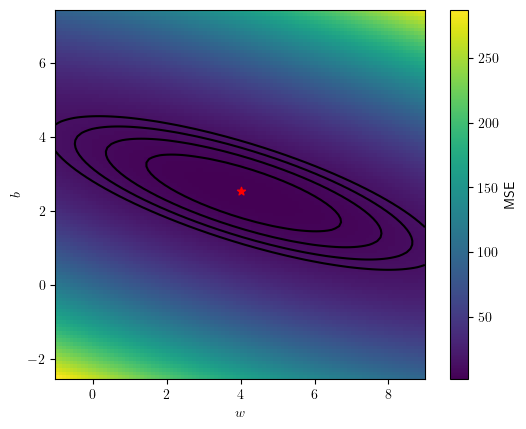

In [124]:
# Define the range of values for w and b
width_w = 5
width_b = 5
n_points = 100
w_vals = np.linspace(WTRUE-width_w, WTRUE+width_w, n_points)
b_vals  = np.linspace(BTRUE-width_b, BTRUE+width_b, n_points)

# Create a meshgrid of the range of values for w and b
W, B = np.meshgrid(w_vals, b_vals)

Z = np.zeros_like(W)
for i, w in enumerate(w_vals):
    for j, b in enumerate(b_vals):
        loss_val = loss(xsamples.copy(), ysamples.copy(), w, b)
        Z[i, j] = loss_val

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(Z, cmap='viridis', extent=[w_vals.min(), w_vals.max(), b_vals.min(), b_vals.max()], origin='lower')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label("MSE")
# Add contour lines
contour_levels = np.linspace(Z.min(), Z.max()//20, 5)
contours = ax.contour(W, B, Z, levels=contour_levels, colors='black')

ax.scatter(w_sol, b_sol, color="red", marker="*")

# Set the axis labels and title
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$b$')
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_linear_regression_weights.pdf"), bbox_inches='tight')
plt.show()

## Loss landscape in 3D

In [70]:
from mpl_toolkits.mplot3d import Axes3D

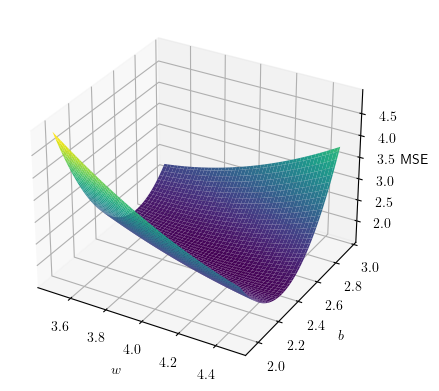

In [130]:
# Define the range of values for w and b
width_w = 0.5
width_b = 0.5
n_points = 100
w_vals = np.linspace(WTRUE-width_w, WTRUE+width_w, n_points)
b_vals  = np.linspace(BTRUE-width_b, BTRUE+width_b, n_points)

# Create a meshgrid of the range of values for w and b
W, B = np.meshgrid(w_vals, b_vals)

Z = np.zeros_like(W)
for i, w in enumerate(w_vals):
    for j, b in enumerate(b_vals):
        loss_val = loss(xsamples.copy(), ysamples.copy(), w, b)
        Z[i, j] = loss_val

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W, B, Z, cmap='viridis', alpha = 1)

# Plot location of the solution (not so clear, don't do it)
# loss_sol = loss(xsamples, ysamples, w_sol, b_sol)
# ax.scatter(w_sol, b_sol, loss_sol, color="red", marker="*", s=50, zorder=1000)

# Set the axis labels and title
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$b$')
ax.set_zlabel('MSE')
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_linear_regression_weights_3D.pdf"), bbox_inches='tight')
plt.show()